In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#creating the dataset
dataset = pd.read_csv("train.csv")
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [18]:
#merging the datasets with left join
dataset = dataset.merge(stores, how = 'left').merge(features, how = 'left')
dataset

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,05-02-2010,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,1,12-02-2010,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,1,19-02-2010,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,1,26-02-2010,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,1,05-03-2010,21827.90,False,A,151315,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28-09-2012,508.37,False,B,118221,64.88,3.997,192.013558,8.684
421566,45,98,05-10-2012,628.10,False,B,118221,64.89,3.985,192.170412,8.667
421567,45,98,12-10-2012,1061.02,False,B,118221,54.47,4.000,192.327265,8.667
421568,45,98,19-10-2012,760.01,False,B,118221,56.47,3.969,192.330854,8.667


Text(0.5, 0, 'Dept')

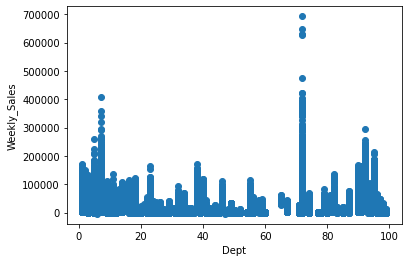

In [6]:
column1 = 'Dept'
column2 = 'Weekly_Sales'
plt.scatter(dataset[column1], dataset[column2])
plt.ylabel(column2)
plt.xlabel(column1)

Text(0.5, 0, 'Store')

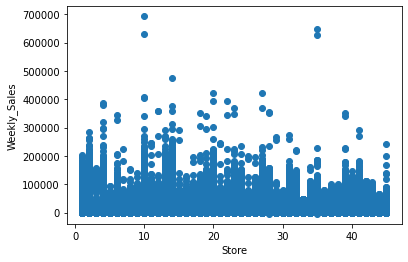

In [7]:
column1 = 'Store'
column2 = 'Weekly_Sales'
plt.scatter(dataset[column1], dataset[column2])
plt.ylabel(column2)
plt.xlabel(column1)

Text(0.5, 0, 'Unemployment')

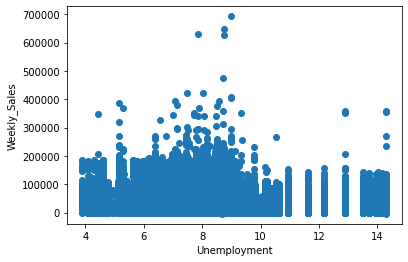

In [8]:
column1 = 'Unemployment'
column2 = 'Weekly_Sales'
plt.scatter(dataset[column1], dataset[column2])
plt.ylabel(column2)
plt.xlabel(column1)

Text(0.5, 0, 'CPI')

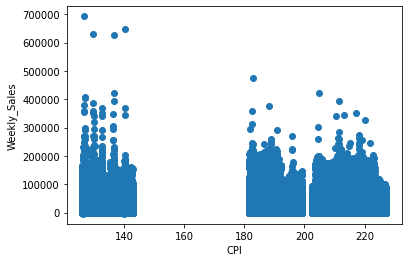

In [9]:
column1 = 'CPI'
column2 = 'Weekly_Sales'
plt.scatter(dataset[column1], dataset[column2])
plt.ylabel(column2)
plt.xlabel(column1)

Text(0.5, 0, 'Temperature')

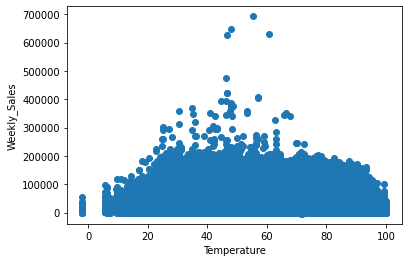

In [10]:
column1 = 'Temperature'
column2 = 'Weekly_Sales'
plt.scatter(dataset[column1], dataset[column2])
plt.ylabel(column2)
plt.xlabel(column1)

Text(0.5, 0, 'Fuel_Price')

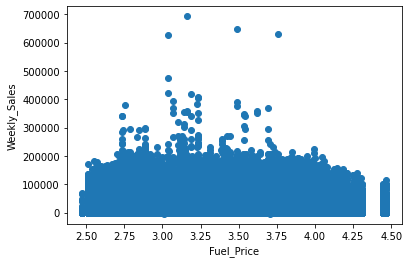

In [11]:
column1 = 'Fuel_Price'
column2 = 'Weekly_Sales'
plt.scatter(dataset[column1], dataset[column2])
plt.ylabel(column2)
plt.xlabel(column1)

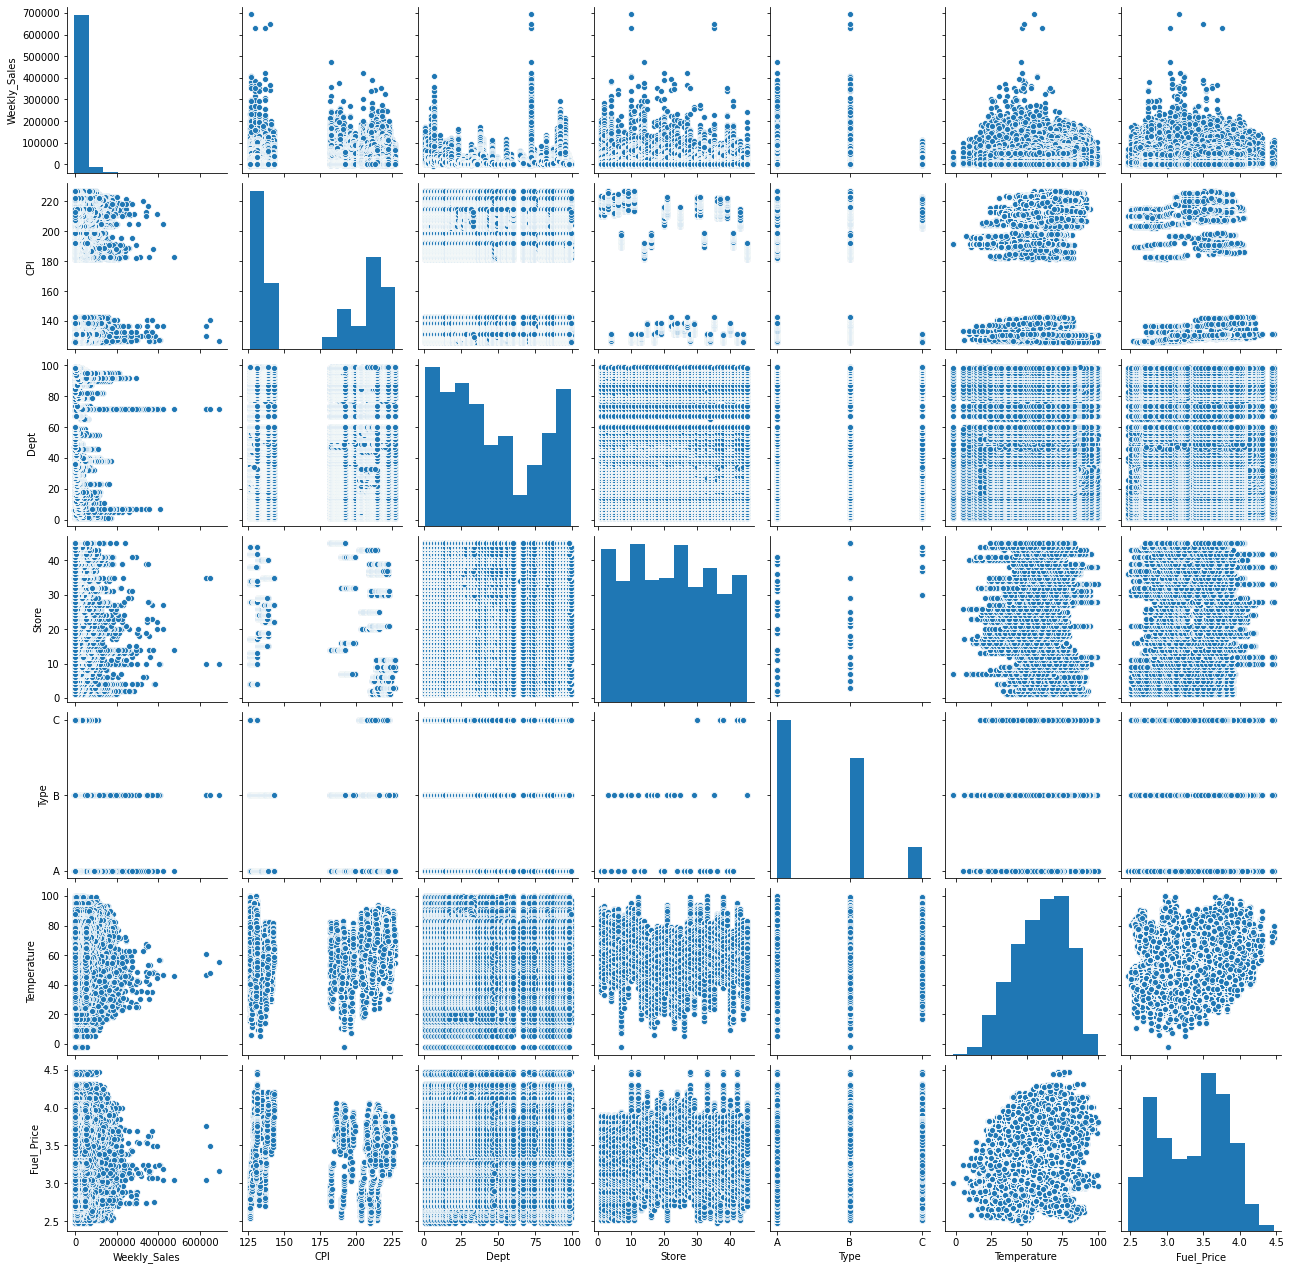

In [12]:
sns.pairplot(dataset, vars = ['Weekly_Sales', 'CPI', 'Dept', 'Store', 'Type', 'Temperature', 'Fuel_Price'])

In [0]:
dataset.Date = pd.to_datetime(dataset.Date)
train.Date = pd.to_datetime(train.Date)
test.Date = pd.to_datetime(test.Date)
dataset['Week'] = dataset.Date.dt.week 
dataset['Year'] = dataset.Date.dt.year

In [0]:
dummy = pd.get_dummies(dataset.Type)
dataset = pd.concat([dataset, dummy], axis=1)
dataset = dataset.drop(columns='Type')

In [0]:
dataset = dataset.drop(columns = 'Date')

In [0]:
dataset = dataset[['Store','Dept','IsHoliday','Size','Temperature', 'Fuel_Price','CPI','Unemployment','Week','Year','A','B','C','Weekly_Sales']]

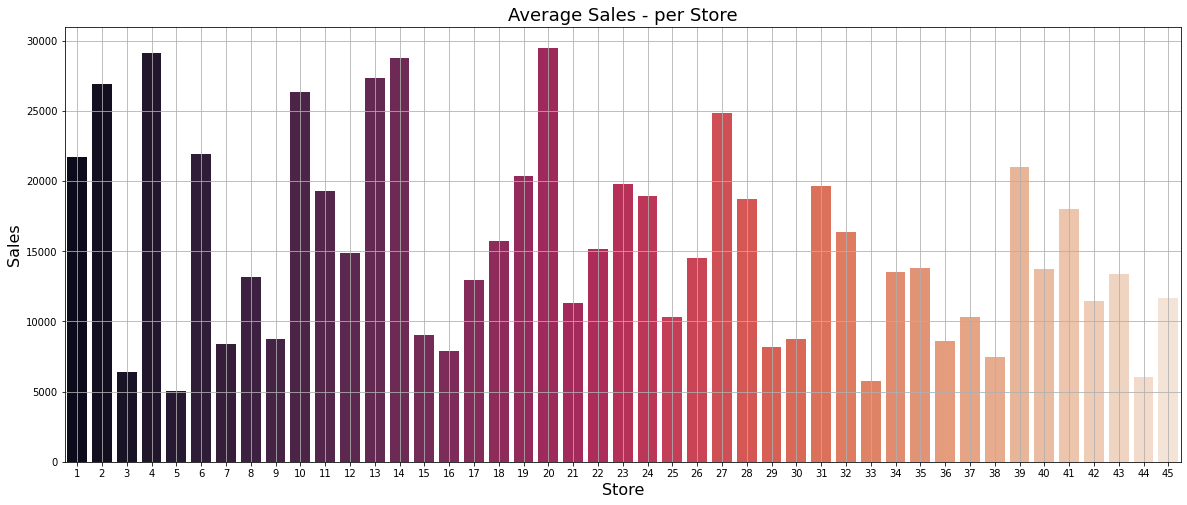

In [23]:
weekly_sales = train['Weekly_Sales'].groupby(train['Store']).mean()
plt.figure(figsize=(20,8))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='rocket')
plt.grid()
plt.title('Average Sales - per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

In [0]:
X = dataset.iloc[:, :14].values
y = dataset.iloc[:, -1].values

In [0]:
def WMAE(dataset, real, predicted):
    weights = dataset.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(real-predicted))/(np.sum(weights)), 2)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsRegressor
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 2934.539057342966
RMSE value for k=  2 is: 2595.5398992439896
RMSE value for k=  3 is: 2543.661798764371
RMSE value for k=  4 is: 2560.45121038921
RMSE value for k=  5 is: 2603.8027677184837
RMSE value for k=  6 is: 2655.2659845856665
RMSE value for k=  7 is: 2716.623656900424
RMSE value for k=  8 is: 2767.4064180999367
RMSE value for k=  9 is: 2826.877713962906
RMSE value for k=  10 is: 2879.6701656966757
RMSE value for k=  11 is: 2928.0456893914757
RMSE value for k=  12 is: 2973.45485091137
RMSE value for k=  13 is: 3018.6834589562377
RMSE value for k=  14 is: 3062.5738351188156
RMSE value for k=  15 is: 3101.8174524622495
RMSE value for k=  16 is: 3141.390636190269
RMSE value for k=  17 is: 3175.404975750531
RMSE value for k=  18 is: 3210.4266579478103
RMSE value for k=  19 is: 3247.3408095500486
RMSE value for k=  20 is: 3283.166753531629


In [47]:
import sklearn.metrics as metrics
y_pred = model.predict(X_test)
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = model.score(X_test, y_test)

2312.5928250705692
10779183.931495419
3283.166753531629


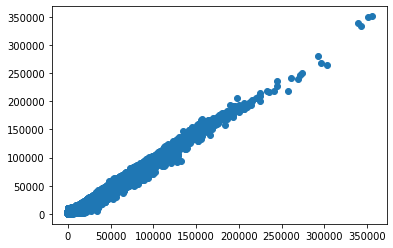

In [48]:
plt.scatter(y_test, y_pred)
plt.show()

In [0]:
#linear regressor

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)
y_pred = regressor.predict(X_test)

15976.528402430566
[ 5.81529747e-13  1.77351467e-11 -4.18776125e-12 -3.97903932e-12
 -1.21360699e-11 -2.16004992e-12 -6.36646291e-12 -1.11413101e-11
 -8.88444873e-12  1.99840144e-13 -4.57301098e-07 -4.45783144e-07
 -2.75482762e-07  2.27166455e+04]


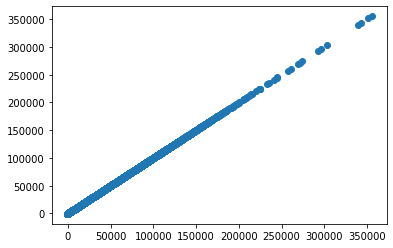

In [51]:
plt.scatter(y_test, y_pred)
plt.show()

In [52]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = regressor.score(X_test, y_test)

2.754066694287157e-11
1.2241969281967417e-21
3.498852566480534e-11


In [0]:
#xgb
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgb_clf = XGBRegressor(objective='reg:linear', nthread= 4, n_estimators= 500, max_depth= 6, learning_rate= 0.5) 
xb = xgb_clf.fit(X_train,y_train)
y_pred=xgb_clf.predict(X_test)
plt.scatter(y_test, y_pred)
plt.show()

In [54]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import datetime
from sklearn.model_selection import GridSearchCV
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed: 23.8min finished


0.9991604315249406
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


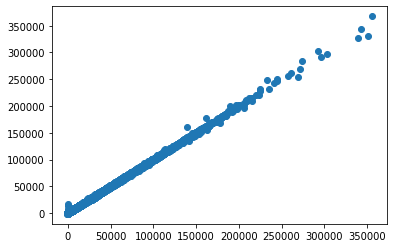

In [58]:
y_pred = xgb_grid.predict(X_test)
plt.scatter(y_test, y_pred)
plt.show()

In [60]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = xgb_grid.score(X_test, y_test)

221.8209742621219
161993.5770013043
402.4842568365927


In [0]:
accuracy_knn = model.score(X_test, y_test)
accuracy_regression = regressor.score(X_test, y_test)
accuracy_xgb = xgb_grid.score(X_test, y_test)

In [70]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Model", "MAE", "MSE", "RMSE", "Accuracy"]
x.add_row(["LinearRegressor(BASELINE)", 2.754066694287157e-11, 1.2241969281967417e-21, 3.498852566480534e-11, accuracy_regression])
x.add_row(["KNNRegressor", 2312.5928250705692, 10779183.931495419, 3283.166753531629, accuracy_knn])
x.add_row(["XGBRegressor", 221.82097426212191, 161993.5770013043, 402.4842568365927, accuracy_xgb])
print(x)

+---------------------------+-----------------------+------------------------+-----------------------+--------------------+
|           Model           |          MAE          |          MSE           |          RMSE         |      Accuracy      |
+---------------------------+-----------------------+------------------------+-----------------------+--------------------+
| LinearRegressor(BASELINE) | 2.754066694287157e-11 | 1.2241969281967417e-21 | 3.498852566480534e-11 |        1.0         |
|        KNNRegressor       |   2312.5928250705692  |   10779183.931495419   |   3283.166753531629   | 0.9790613650499077 |
|        XGBRegressor       |   221.82097426212192  |   161993.5770013043    |   402.4842568365927   | 0.9996853264222368 |
+---------------------------+-----------------------+------------------------+-----------------------+--------------------+
